In [16]:
import time
import random
import tracemalloc
import pandas as pd
import matplotlib.pyplot as plt

### Алгоритм Флойда- Уоршала

In [2]:
def floyd_warshall(graph):
    # Создаем копию графа, чтобы изменять его без потери исходных данных
    dist = graph.copy()

    # Проходим по всем вершинам в качестве промежуточной вершины
    for k in dist:
        for i in dist:
            for j in dist:
                # Если путь через вершину k короче, чем текущий путь, заменяем его
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

### Оптимизированный Алгоритм Флойда- Уоршала

In [3]:
def opt_floyd_warshall(graph):
    dist = graph.copy()

    for k in graph:
        for i in graph:
            for j in graph:
                new_dist = dist[i][k] + dist[k][j]
                if dist[i][j] > new_dist:
                    dist[i][j] = new_dist

    return dist

### Генерация графов

In [4]:
def generate_random_graph(vertices, edge_probability):
    graph = {}
    
    for i in range(vertices):
        graph[chr(65 + i)] = {}
        for j in range(vertices):
            if i != j and random.random() < edge_probability:
                graph[chr(65 + i)][chr(65 + j)] = random.randint(1, 10)
            else:
                graph[chr(65 + i)][chr(65 + j)] = float('inf')
    
    return graph


In [11]:
def test_floyd_warshall(floyd_warshall, points):    
    output = {
        "Number of vertices": [],
        "Time": [],
        "Used memory": [],
        "Peak memory": []
    }

    for point in points:
        generated_graph = generate_random_graph(point, 0.5)

        start_time = time.time()
        tracemalloc.start()

        result = floyd_warshall(generated_graph)

        current, peak = tracemalloc.get_traced_memory()
        end_time = time.time() - start_time
        tracemalloc.stop()
        tracemalloc.clear_traces()

        output["Number of vertices"].append(point)
        output["Time"].append(end_time)
        output["Used memory"].append(current/1048576)
        output["Peak memory"].append(peak/1048576)
        print(point)

    return pd.DataFrame(output).set_index('Number of vertices').round(3)
        

In [21]:
basic_fw = test_floyd_warshall(floyd_warshall=floyd_warshall, points=[100, 200, 300, 400, 500])

100
200
300
400
500


In [26]:
basic_fw

,Time,Used memory,Peak memory
Number of vertices,,,
100,0.481,0.005,0.006
200,3.733,0.010,0.013
300,12.924,0.010,0.013
400,29.852,0.019,0.022
500,59.435,0.019,0.022


In [22]:
opt_fw = test_floyd_warshall(floyd_warshall=opt_floyd_warshall, points=[100, 200, 300, 400, 500])

100
200
300
400
500


In [27]:
opt_fw

,Time,Used memory,Peak memory
Number of vertices,,,
100,0.108,0.006,0.010
200,0.765,0.010,0.013
300,2.743,0.010,0.013
400,6.352,0.019,0.022
500,12.800,0.019,0.022


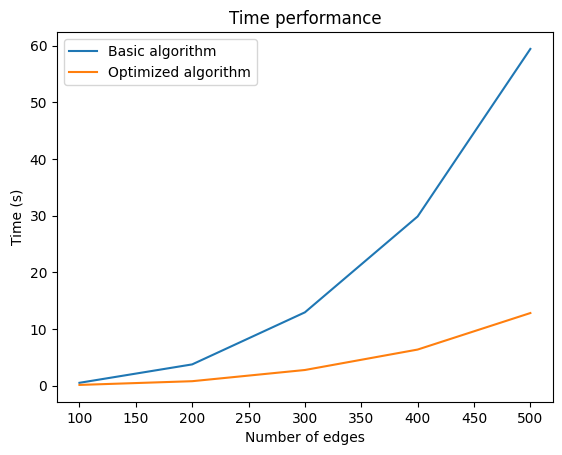

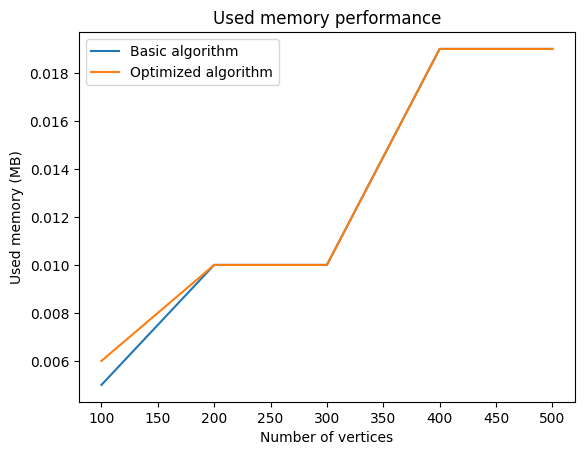

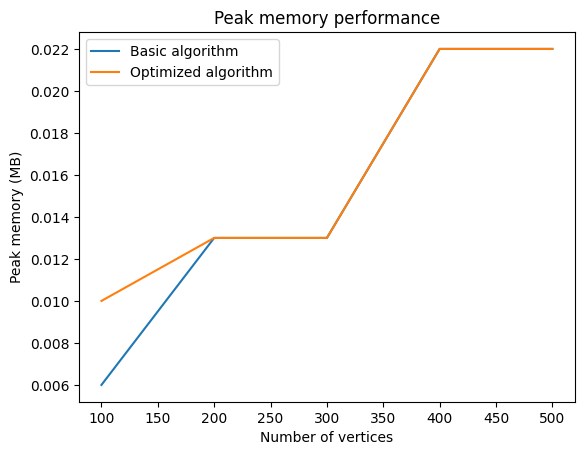

In [25]:
plt.plot(basic_fw.index, basic_fw['Time'])
plt.plot(opt_fw.index, opt_fw['Time'])
plt.title('Time performance')
plt.ylabel('Time (s)')
plt.xlabel('Number of edges')
plt.legend(['Basic algorithm', 'Optimized algorithm'])
plt.show()

plt.plot(basic_fw.index, basic_fw['Used memory'])
plt.plot(opt_fw.index, opt_fw['Used memory'])
plt.title('Used memory performance')
plt.ylabel('Used memory (MB)')
plt.xlabel('Number of vertices')
plt.legend(['Basic algorithm', 'Optimized algorithm'])
plt.show()

plt.plot(basic_fw.index, basic_fw['Peak memory'])
plt.plot(opt_fw.index, opt_fw['Peak memory'])
plt.title('Peak memory performance')
plt.ylabel('Peak memory (MB)')
plt.xlabel('Number of vertices')
plt.legend(['Basic algorithm', 'Optimized algorithm'])
plt.show()